# Data Exploration

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [283]:
orders = pd.read_excel('./Excel/Superstore.xls', 'Orders')
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
people = pd.read_excel('./Excel/Superstore.xls', 'People')
people.head()

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [284]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [297]:
orders['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [6]:
returns = pd.read_excel('./Excel/Superstore.xls', 'Returns')
returns.head()

,Returned,Order ID
0,Yes,CA-2017-100762
1,Yes,CA-2017-100762
2,Yes,CA-2017-100762
3,Yes,CA-2017-100762
4,Yes,CA-2017-100867


In [287]:
productos = orders['Ship Mode'].unique()
productos[:10]

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [13]:
len(productos)

1849

In [14]:
orders.shape

(9994, 21)

In [15]:
orders['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [20]:
orders['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [21]:
orders['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [22]:
orders['Country/Region'].unique()

array(['United States'], dtype=object)

In [290]:
(orders['City'].unique())

AttributeError: 'DataFrame' object has no attribute 'unique'

In [24]:
orders['Order Date'] = pd.to_datetime(orders['Order Date'])
orders['Order Date'].head()

0   2019-11-08
1   2019-11-08
2   2019-06-12
3   2018-10-11
4   2018-10-11
Name: Order Date, dtype: datetime64[ns]

# Data Analysis

C:\Users\gabri\AppData\Local\Temp\ipykernel_3692\807226893.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ventas_mes.index, rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Order Date
January 2017      79
February 2017     46
March 2017       157
April 2017       135
May 2017         122
Name: Order Date, dtype: int64

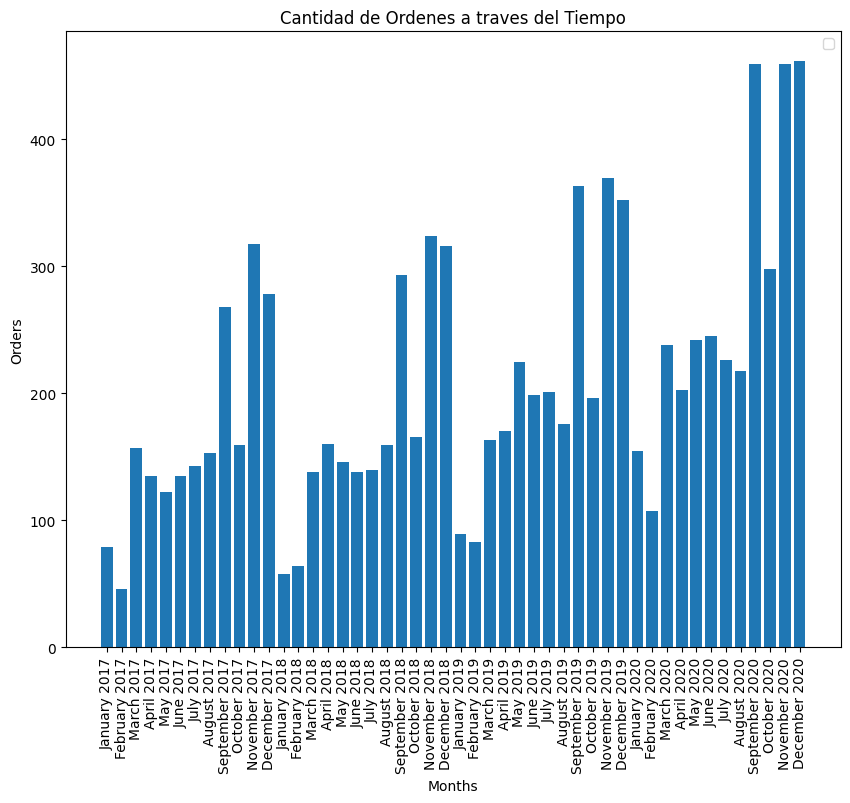

In [4]:
ventas_mes = orders.groupby(pd.Grouper(key='Order Date', freq='M'))['Order Date'].count()
ventas_mes.index = ventas_mes.index.strftime('%B %Y')

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(ventas_mes.index, ventas_mes.values)
ax.set_xlabel('Months')
ax.set_ylabel('Orders')
ax.set_xticklabels(ventas_mes.index, rotation=90)
ax.set_title('Cantidad de Ordenes a traves del Tiempo')
ax.legend()


ventas_mes.head()

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


Text(0.5, 1.0, 'Comparacion de ventas por mes')

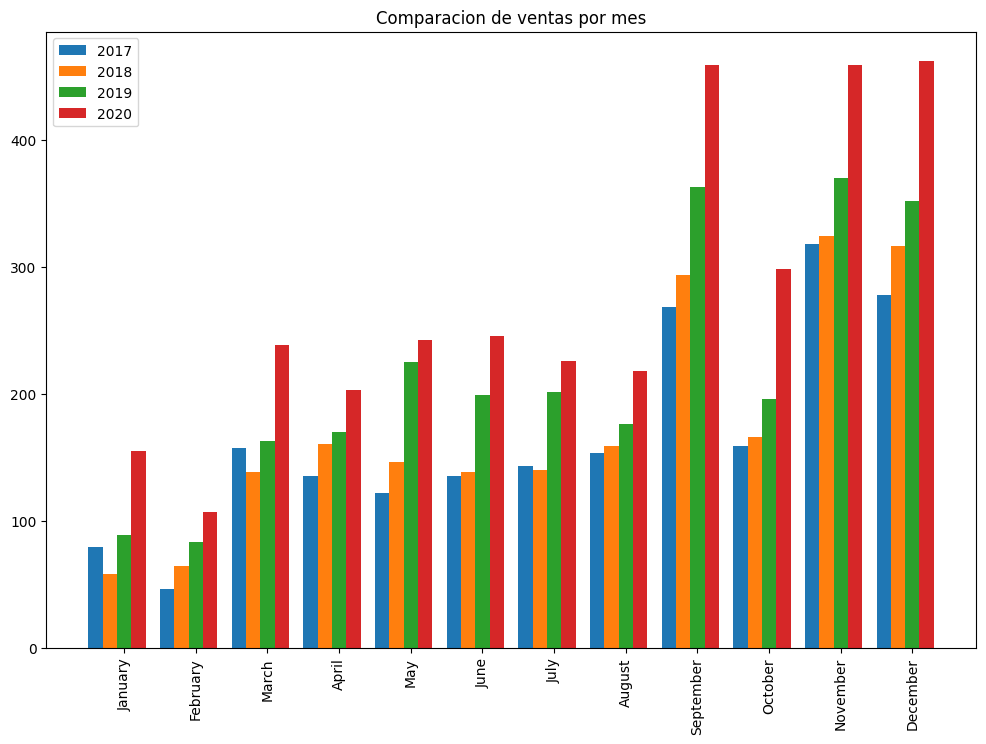

In [298]:
ventas_2017 = ventas_mes[ventas_mes.index.str.endswith('2017')]
ventas_2018 = ventas_mes[ventas_mes.index.str.endswith('2018')]
ventas_2019 = ventas_mes[ventas_mes.index.str.endswith('2019')]
ventas_2020 = ventas_mes[ventas_mes.index.str.endswith('2020')]
indice = ventas_mes.index.str.split().str.get(0).unique()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ind = np.array([0,1,2,3,4,5,6,7,8,9,10,11], dtype=float)
print(ind)


ax.bar(x=ind-0.4, height=ventas_2017, width=0.2)
ax.bar(x=ind-0.2, height=ventas_2018, width=0.2)
ax.bar(x=ind, height=ventas_2019, width=0.2)
ax.bar(x=ind+0.2, height=ventas_2020, width=0.2)

ax.set_xticks(np.arange(len(indice)))
ax.set_xticklabels(indice, rotation=90)
ax.legend(['2017','2018','2019','2020'])
ax.set_title('Comparacion de ventas por mes')


In [89]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [7]:
#Agregamos una columna de devolucion para saber que ordenes fueron devueltas
orders['Returned'] = orders['Order ID'].isin(returns['Order ID']).astype(int)


In [100]:
orders.loc[orders['Returned'] == 1].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
18,19,CA-2017-143336,2017-08-27,2017-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.56,2,0.0,2.4824,1
19,20,CA-2017-143336,2017-08-27,2017-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.48,3,0.2,16.0110,1
20,21,CA-2017-143336,2017-08-27,2017-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.72,4,0.2,7.3840,1
55,56,CA-2019-111682,2019-06-17,2019-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,East,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.56,6,0.0,52.1400,1
56,57,CA-2019-111682,2019-06-17,2019-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,East,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,32.40,5,0.0,15.5520,1


In [8]:
len(orders['Customer ID'].unique())

793

In [295]:
from geopy import geocoders
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import ssl
import geopy.geocoders
from time import sleep
ctx = ssl.create_default_context(cafile='C:/Users/gabri/AppData/Local/Programs/Python/Python312/Lib/site-packages/certifi/cacert.pem')
geopy.geocoders.options.default_ssl_context = ctx
geopy.geocoders.options.default_user_agent = "my-application"


In [296]:
# Crear un objeto geolocalizador Nominatim
#geolocator = Nominatim(user_agent="my_geocoder")

# Crear un limitador de velocidad para no superar las tasas de solicitud
lista_ciudades = orders[['City','State']].drop_duplicates()
geolocator = Nominatim(user_agent="my_geocoder")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
def geo_location(fila):
    region = fila['City']+ ', '+fila['State']
    location = geolocator.geocode(region, timeout=None)
    return pd.Series([location.latitude, location.longitude])

lista_ciudades[['lat', 'long']] = lista_ciudades.apply(geo_location, axis=1)




In [299]:
lista_ciudades.columns

Index(['City', 'State', 'lat', 'long'], dtype='object')

In [300]:
city_count = orders.groupby(['City','State'],as_index=False).size()
city_count

,City,State,size
0,Aberdeen,South Dakota,1
1,Abilene,Texas,1
2,Akron,Ohio,21
3,Albuquerque,New Mexico,14
4,Alexandria,Virginia,16
...,...,...,...
599,Woonsocket,Rhode Island,4
600,Yonkers,New York,15
601,York,Pennsylvania,5
602,Yucaipa,California,1


In [301]:
graph_ciudades = pd.merge(city_count, lista_ciudades, how='left', left_on=['City','State'], right_on = ['City','State'])

In [302]:
len(graph_ciudades)

604

In [17]:
import plotly.express as px
#px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_geo(graph_ciudades,
                    lat=graph_ciudades['lat'],
                    lon=graph_ciudades['long'],
                    hover_name="City",
                    size='size',
                     width=1000, height=800)
fig.update_layout(
        title = 'Ordenes por Ciudad de Estados Unidos',
        geo_scope='usa',
    )
fig.show()

In [115]:
%load_ext autoreload
%autoreload 2

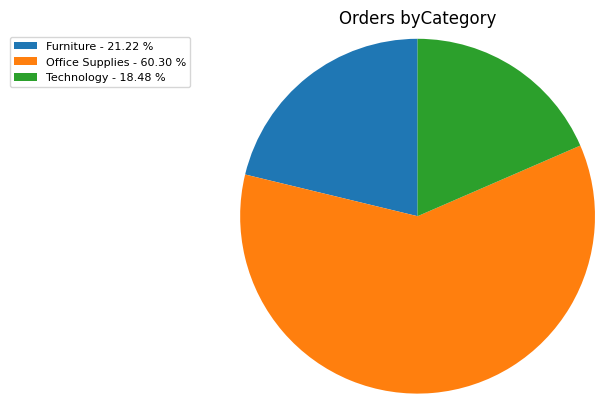

In [34]:
def columnPercentages(df,col):
    aux = df.groupby(col)[col].count().rename_axis(col).reset_index(name='orders_count')
    porcent = 100.*aux['orders_count']/aux['orders_count'].sum()
    patches, texts = plt.pie(aux['orders_count'], startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(aux[col],porcent )]

    plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
            fontsize=8)
    
    plt.title('Orders by' + str.title(col))
    plt.show()
    
columnPercentages(orders,'Category')

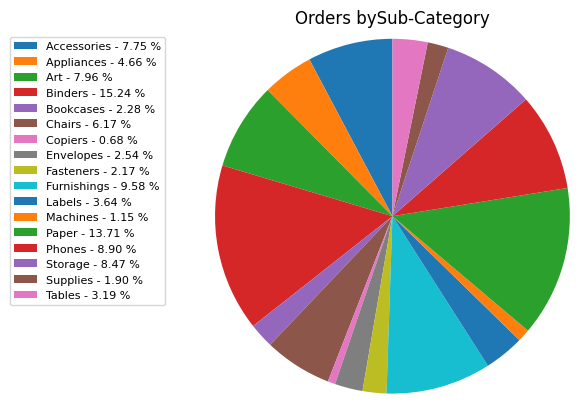

In [26]:
columnPercentages(orders,'Sub-Category')

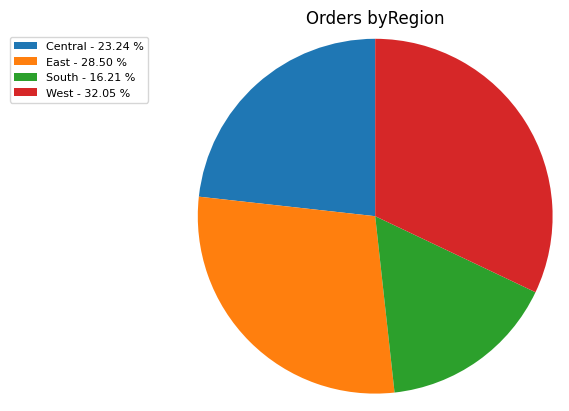

In [27]:
columnPercentages(orders,'Region')

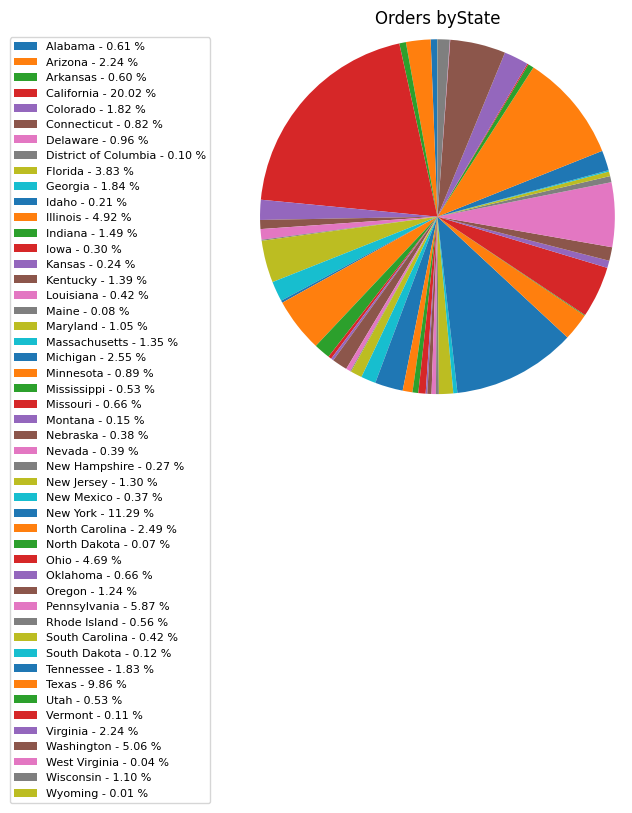

In [28]:
columnPercentages(orders,'State')

C:\Users\gabri\AppData\Local\Temp\ipykernel_3692\1391936012.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(aux[col], rotation=90)


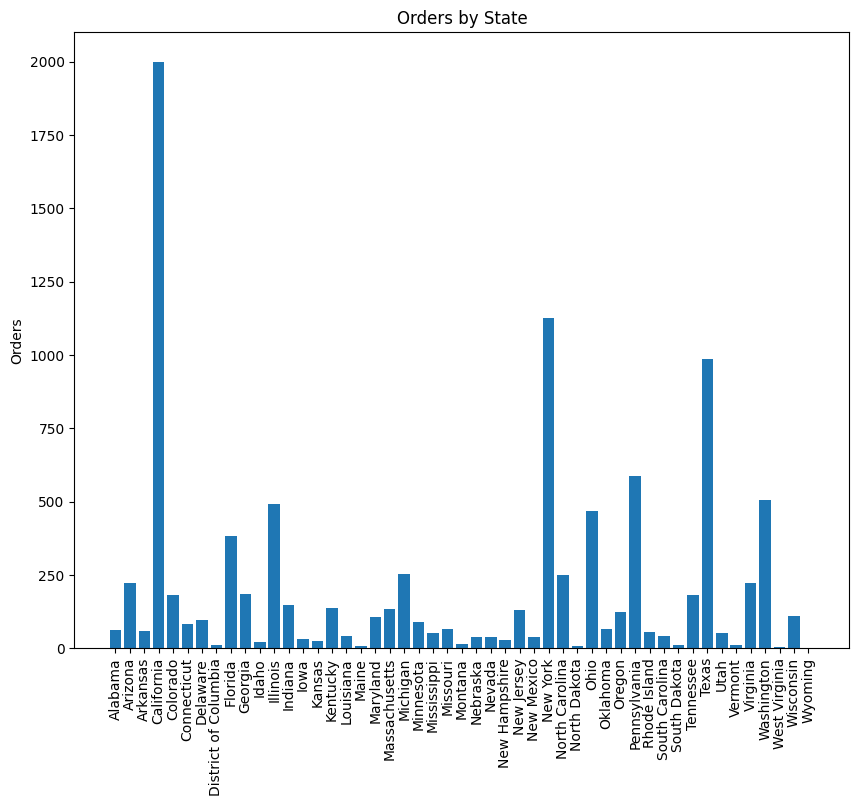

In [14]:
def columnHistogram(df,col):
    aux = df.groupby(col,as_index=False)['Row ID'].count()
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.bar(aux[col], aux['Row ID'])
    #ax.set_xlabel(aux[col])
    ax.set_ylabel('Orders')
    ax.set_xticklabels(aux[col], rotation=90)
    ax.set_title('Orders by '+col)
columnHistogram(orders,'State')


C:\Users\gabri\AppData\Local\Temp\ipykernel_3692\1391936012.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(aux[col], rotation=90)


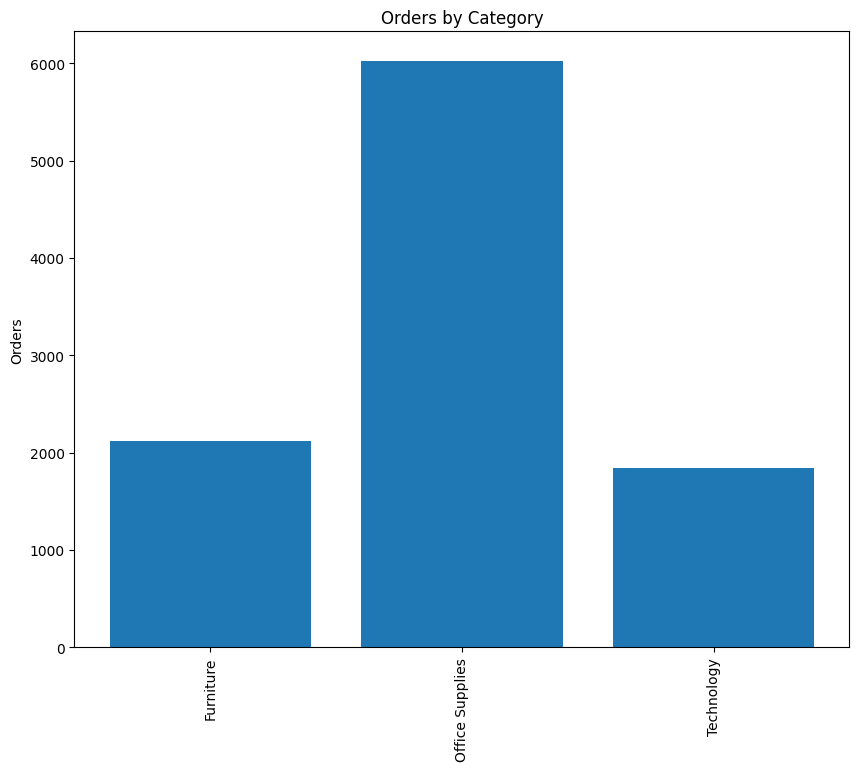

In [15]:
columnHistogram(orders, 'Category')

C:\Users\gabri\AppData\Local\Temp\ipykernel_3692\1391936012.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(aux[col], rotation=90)


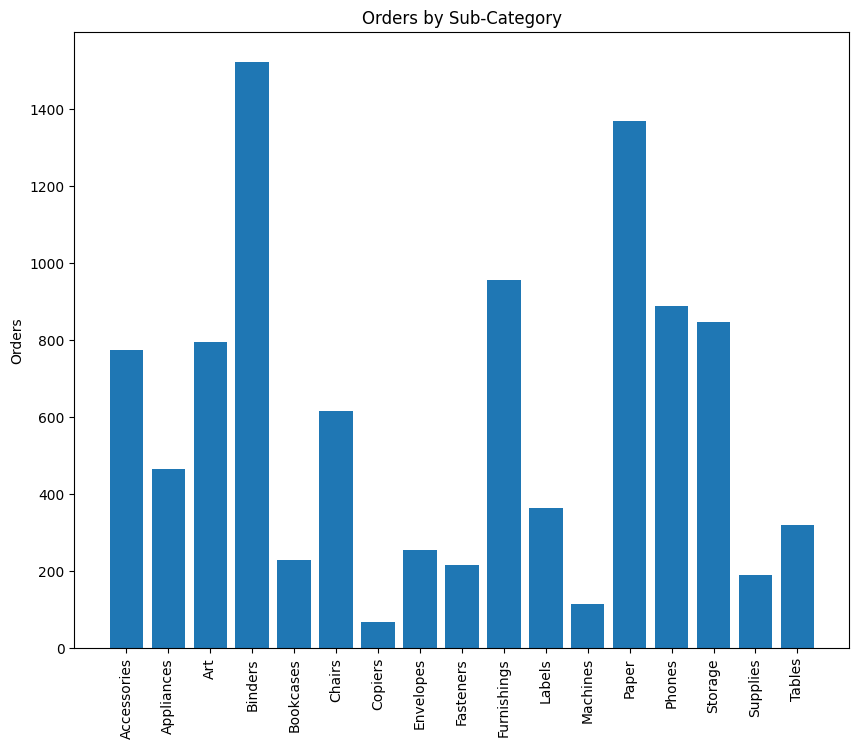

In [16]:
columnHistogram(orders, 'Sub-Category')

# Regression Model

In [19]:
orders.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,0
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0


Presentaré 2 modelos de regresion:
- Modelo para predecir la probabilidad de retorno de una orden.
- Modelo para predecir la ganancia esperada de un determinado pedido

In [21]:
# Source: https://maxhalford.github.io/blog/target-encoding-done-the-right-way/
def calc_smooth_mean(df,df1, df2, cat_name, target, weight):
    # Compute the global mean
    mean = df[target].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(cat_name)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + weight * mean) / (counts + weight)

    # Replace each value by the according smoothed mean
    if df2 is None:
        return df1[cat_name].map(smooth)
    else:
        return df1[cat_name].map(smooth),df2[cat_name].map(smooth.to_dict())

In [20]:
orders['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [23]:
filtro_returned = orders[orders['Returned'] == True]


C:\Users\gabri\AppData\Local\Temp\ipykernel_3692\1391936012.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(aux[col], rotation=90)


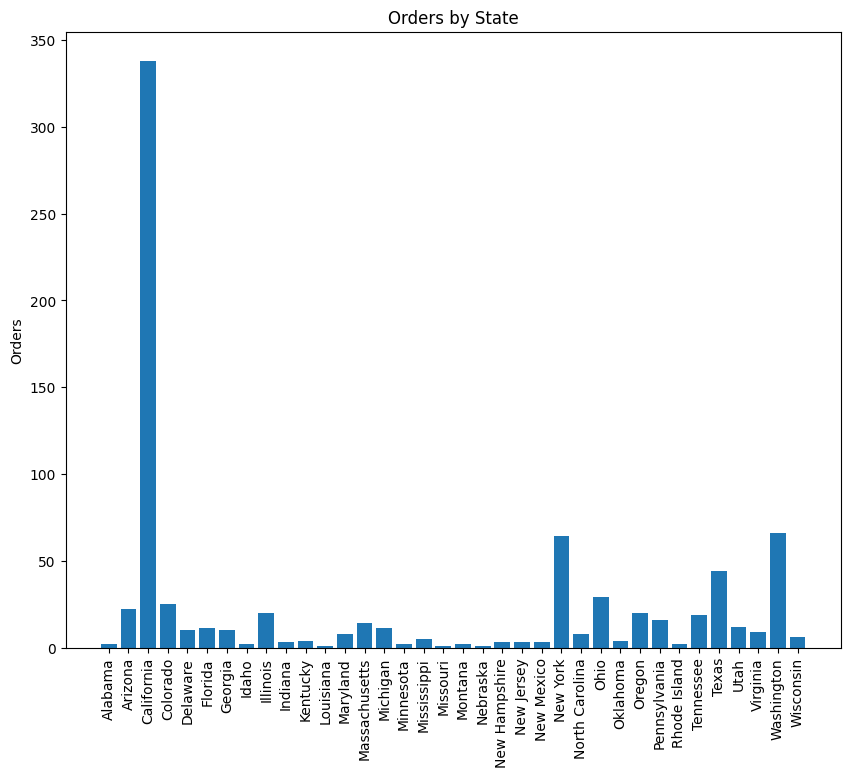

In [24]:
columnHistogram(filtro_returned,'State')

In [37]:
filtro_returned_state = filtro_returned.groupby('State', as_index=False)['Row ID'].count()
filtro_returned_state.head()

#filtro_returned_state[36:48] = 
#filtro_returned_state['Perc State'] = filtro_returned_state.values/filtro_state.values
#filtro_returned_state.head()

,State,Row ID
0,Alabama,2
1,Arizona,22
2,California,338
3,Colorado,25
4,Delaware,10


In [38]:
filtro_state = orders.groupby('State', as_index=False)['Row ID'].count()
filtro_state.head()

,State,Row ID
0,Alabama,61
1,Arizona,224
2,Arkansas,60
3,California,2001
4,Colorado,182


In [39]:
filtro_state_perc = pd.merge(filtro_state,filtro_returned_state,how='left',on='State')
filtro_state_perc.head()

,State,Row ID_x,Row ID_y
0,Alabama,61,2.0
1,Arizona,224,22.0
2,Arkansas,60,NaN
3,California,2001,338.0
4,Colorado,182,25.0


In [43]:
filtro_state_perc['Row ID_y'] = filtro_state_perc['Row ID_y'].fillna(0)

In [46]:
filtro_state_perc['State Perc'] = filtro_state_perc['Row ID_y']/filtro_state_perc['Row ID_x']

In [49]:
filtro_state_perc.head()

,State,Row ID_x,Row ID_y,State Perc
0,Alabama,61,2.0,0.032787
1,Arizona,224,22.0,0.098214
2,Arkansas,60,0.0,0.000000
3,California,2001,338.0,0.168916
4,Colorado,182,25.0,0.137363


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48.]


Text(0.5, 1.0, 'Comparacion de Ordenes Totales vs. Ordenes Devueltas por Estado')

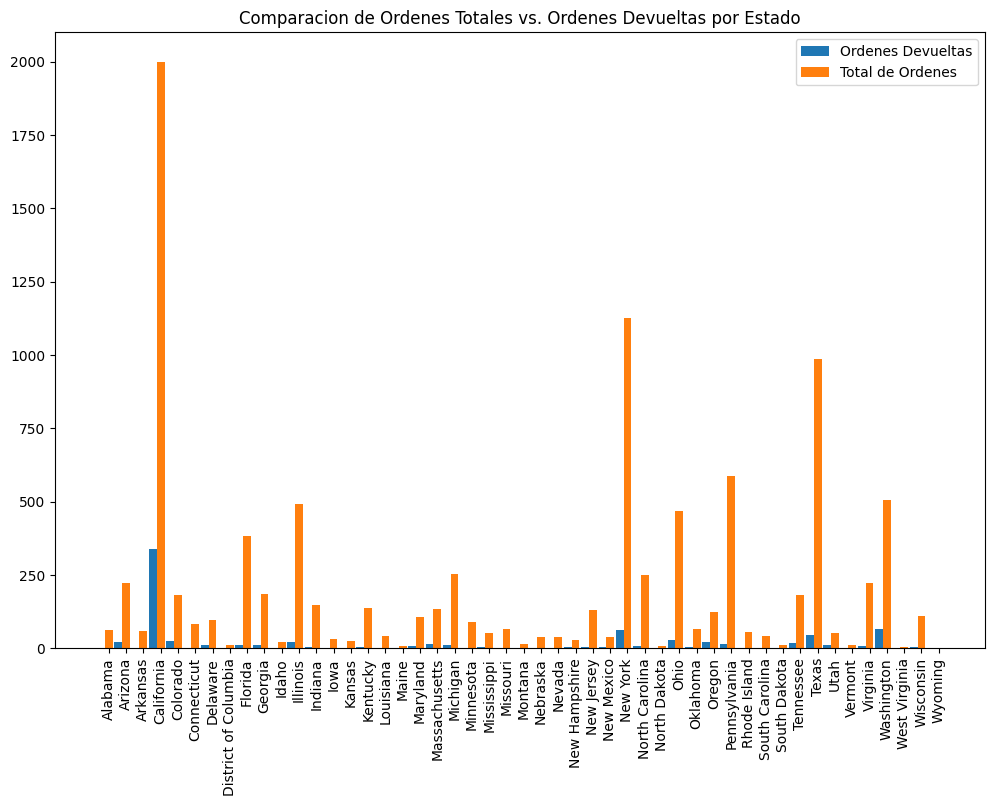

In [57]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ind = np.array(range(0,len(filtro_state_perc)), dtype=float)
print(ind)


ax.bar(x=ind-0.45, height=filtro_state_perc['Row ID_y'], width=0.45)
ax.bar(x=ind, height=filtro_state_perc['Row ID_x'], width=0.45)


ax.set_xticks(np.arange(len(ind)))
ax.set_xticklabels(filtro_state_perc['State'], rotation=90)
ax.legend(['Ordenes Devueltas','Total de Ordenes'])
ax.set_title('Comparacion de Ordenes Totales vs. Ordenes Devueltas por Estado')

Text(0.5, 1.0, 'Ordenes Devueltas por Estado en (%)')

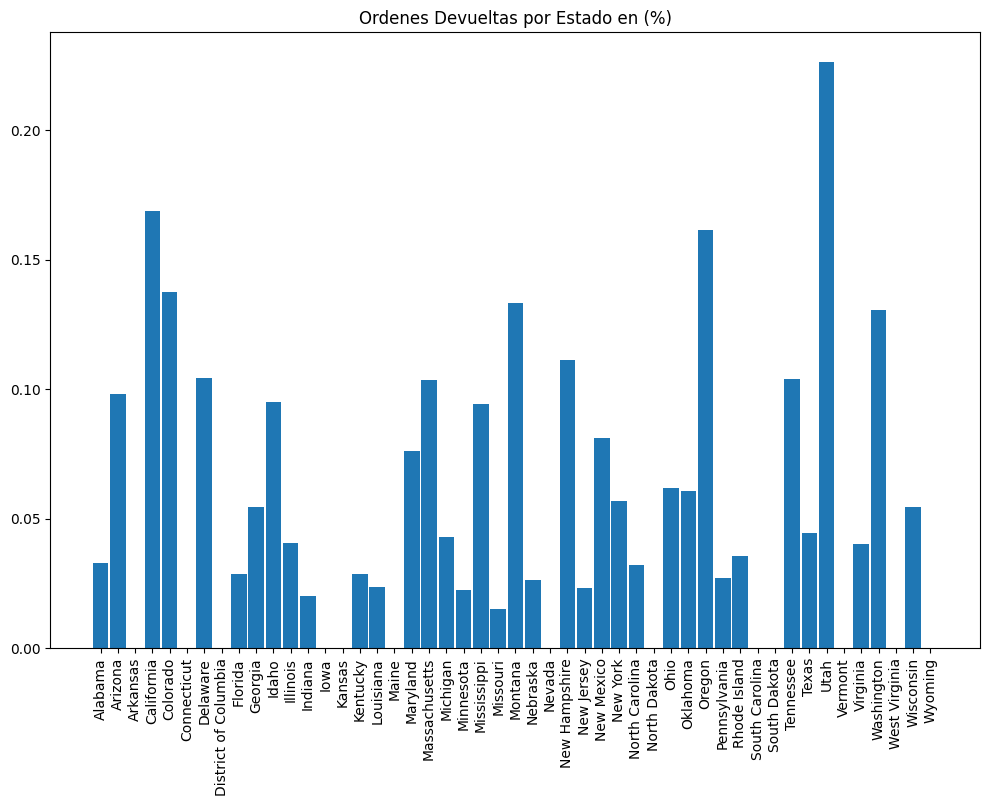

In [56]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.bar(x=filtro_state_perc['State'], height=filtro_state_perc['State Perc'], width=0.9)
ax.set_xticks(np.arange(len(filtro_state_perc['State'])))
ax.set_xticklabels(filtro_state_perc['State'], rotation=90)
ax.set_title('Ordenes Devueltas por Estado en (%)')

In [58]:
filtro_state_perc.sort_values(by='State Perc', ascending=False)

,State,Row ID_x,Row ID_y,State Perc
42,Utah,53,12.0,0.226415
3,California,2001,338.0,0.168916
35,Oregon,124,20.0,0.161290
4,Colorado,182,25.0,0.137363
24,Montana,15,2.0,0.133333
45,Washington,506,66.0,0.130435
27,New Hampshire,27,3.0,0.111111
6,Delaware,96,10.0,0.104167
40,Tennessee,183,19.0,0.103825
19,Massachusetts,135,14.0,0.103704


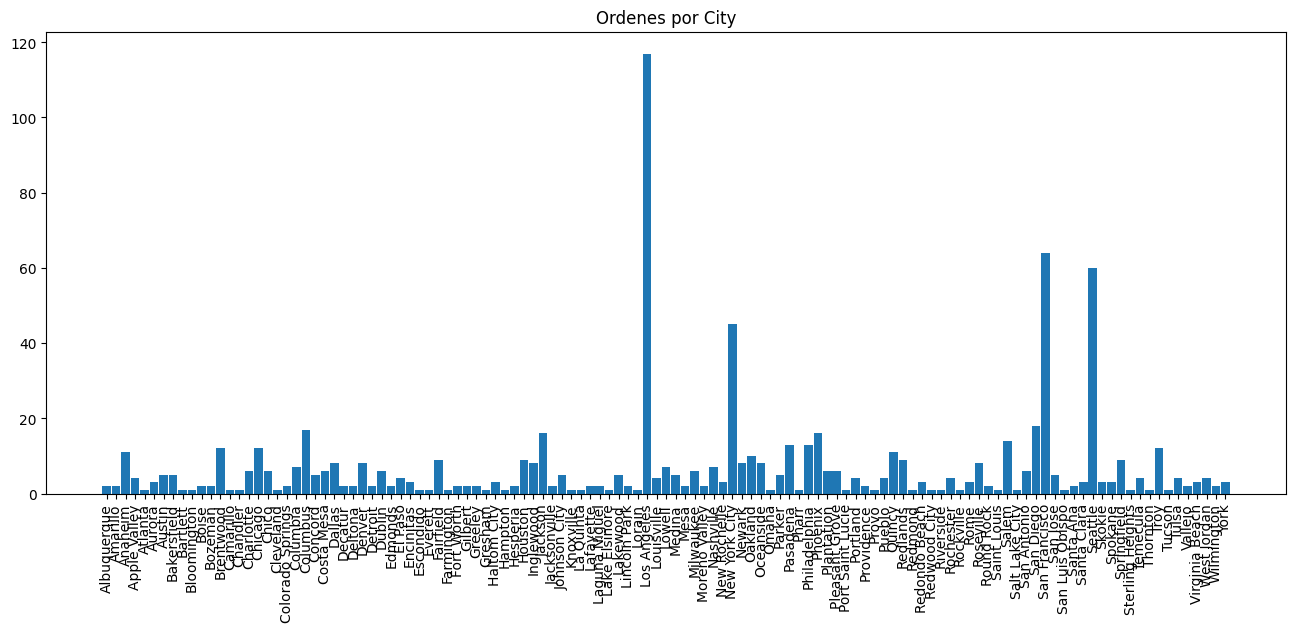

In [311]:

def hitogramPremium(df, colx, coly, groupby):
    
    if(groupby == True and coly == None):
        aux = df.groupby(colx)['Row ID'].count()
        y_vals = aux.values
        x_vals = aux.index
        title ='Ordenes por ' +colx
    else:
        title = ''+coly+' por ' +colx
        x_vals = df[colx]
        y_vals = df[coly]

    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(111)
    ax.bar(x=x_vals, height=y_vals, width=0.9)
    ax.set_xticks(np.arange(len(x_vals)))
    ax.set_xticklabels(x_vals, rotation=90)
    ax.set_title(title)

#filtro_ret_city = filtro_returned.groupby('City', as_index=False)['Row ID']
hitogramPremium(filtro_returned, 'City', None, True)

## Modelo de Retorno
Para este modelo utilizaremos las siguientes columnas:
- Ship Mode
- Segment

In [107]:
# Armamos el dataframe modelo
modelo_returned = orders[['Ship Mode','Segment','City','State','Region','Category','Sub-Category']]
modelo_returned.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [165]:
# Seccion de codigo para funcion de target encoding
dict_target_decoders = {}
def targetEncodingReturned(df_model, df_orders,df_returned,col1,col2, weight, mean_y):
    
    if col2 != None:
        total_counts_col = df_orders.value_counts(subset=[col1,col2], sort=False).reset_index([col1,col2])
        ret_counts_col = df_returned.value_counts(subset=[col1,col2], sort=False).reset_index([col1,col2])
        joint_col = pd.merge(total_counts_col, ret_counts_col, how='left', left_on=[col1,col2], right_on = [col1,col2])
        percentage_name = 'Perc '+col1+' '+col2
    else:
        total_counts_col = df_orders.value_counts(col1, sort=False).reset_index(level=col1)
        ret_counts_col = df_returned.value_counts(col1, sort=False).reset_index(level=col1)
        joint_col = pd.merge(total_counts_col,ret_counts_col,how='left',on=col1)
        percentage_name = 'Perc '+col1

    df_model = df_model.drop([percentage_name],axis=1, errors='ignore')
    joint_col['count_y'] = joint_col['count_y'].fillna(0)
    joint_col[percentage_name] = (joint_col['count_y'] + (weight * mean_y))/(joint_col['count_x'] + weight)
    joint_col = joint_col.drop(['count_x','count_y'],axis=1)

    if col2 != None:
        dict_name = 'Decoder '+col1+' '+col2
        dict_target_decoders.pop(dict_name,None)
        dict_target_decoders[dict_name]= joint_col
        perc_col = pd.merge(df_model,joint_col, how='left', left_on=[col1,col2], right_on = [col1,col2])
    else:
        dict_name = 'Decoder '+col1
        dict_target_decoders.pop(dict_name,None)
        dict_target_decoders[dict_name]= joint_col
        perc_col = pd.merge(df_model,joint_col,how='left',on=col1)
    return perc_col[percentage_name]


In [117]:
mean_y = orders['Returned'].mean()

In [125]:
dict_target_decoders['Decoder City']

,City,Perc City
0,Aberdeen,0.066707
1,Abilene,0.066707
2,Akron,0.015394
3,Albuquerque,0.126328
4,Alexandria,0.019059
...,...,...
526,Woonsocket,0.044471
527,Yonkers,0.020012
528,York,0.340024
529,Yucaipa,0.066707


In [167]:
modelo_y = orders['Returned']
mean_y = modelo_y.mean()
modelo_X = pd.DataFrame()
modelo_X['Perc City State'] = targetEncodingReturned(modelo_returned,orders,filtro_returned,'City','State', 5, mean_y)
modelo_X['Perc State'] = targetEncodingReturned(modelo_returned,orders,filtro_returned,'State',None, 5, mean_y)
modelo_X['Perc Ship Mode'] = targetEncodingReturned(modelo_returned,orders,filtro_returned,'Ship Mode',None, 5, mean_y)
modelo_X['Perc Segment'] = targetEncodingReturned(modelo_returned,orders,filtro_returned,'Segment',None, 5, mean_y)
modelo_X['Perc Region'] = targetEncodingReturned(modelo_returned,orders,filtro_returned,'Region',None, 5, mean_y)
modelo_X['Perc Category'] = targetEncodingReturned(modelo_returned,orders,filtro_returned,'Category',None, 5, mean_y)
modelo_X['Perc Sub-Category'] = targetEncodingReturned(modelo_returned,orders,filtro_returned,'Sub-Category',None, 5, mean_y)
modelo_X.head()

,Perc City State,Perc State,Perc Ship Mode,Perc Segment,Perc Region,Perc Category,Perc Sub-Category
0,0.007552,0.030557,0.068923,0.082063,0.042708,0.080621,0.070387
1,0.007552,0.030557,0.068923,0.082063,0.042708,0.080621,0.085852
2,0.156117,0.168694,0.068923,0.085091,0.152868,0.078494,0.057995
3,0.020012,0.029382,0.075406,0.082063,0.042708,0.080621,0.093828
4,0.020012,0.029382,0.075406,0.082063,0.042708,0.078494,0.067450


In [168]:
len(dict_target_decoders)

7

### Model Building

In [179]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [280]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

df_pruebas_alg = pd.DataFrame(columns=['Algorithm', 'TP','FP','TN','FN','Presicion','Accuracy','Sensibility','F1 Score','ROC AUC Score', 'Scale'])
#Verifico la matriz de Confusión
def prediction_scores(algorithm,y_test, y_pred,scale):
    #tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    matriz = confusion_matrix(y_test, y_pred)
    #print('Matriz de Confusión:')
    #print([tn, fp, fn, tp])
    #print(matriz)
    #Calculo la precisión del modelo
    precision = precision_score(y_test, y_pred)
    #Calculo la exactitud del modelo
    exactitud = accuracy_score(y_test, y_pred)
    #Calculo la sensibilidad del modelo
    sensibilidad = recall_score(y_test, y_pred)
    #Calculo el Puntaje F1 del modelo
    puntajef1 = f1_score(y_test, y_pred)
    #Calculo la curva ROC - AUC del modelo
    roc_auc = roc_auc_score(y_test, y_pred)

    """ print('Precisión del modelo:', precision)
    print('Exactitud del modelo:', exactitud)
    print('Sensibilidad del modelo:', sensibilidad)
    print('Puntaje F1 del modelo:', puntajef1)
    print('Curva ROC - AUC del modelo:', roc_auc) """

    #score_row = {'Algorithm':algorithm,'TP':tp,'FP':fp,'TN':tn,'FN':fn,'Presicion':precision,'Accuracy':exactitud,'Sensibility':sensibilidad,'F1 Score' : puntajef1,'ROC AUC Score':roc_auc }
    score_list = [ algorithm, matriz[0][0], matriz[0][1], matriz[1][1], matriz[1][0], precision, exactitud, sensibilidad, puntajef1, roc_auc, scale]
    return score_list

In [278]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
def train_algorithm(algorithm, scale):
    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(modelo_X, modelo_y, test_size=0.2)
    # escalamos los datos
    if (scale == True):
        escalar = StandardScaler()
        X_train = escalar.fit_transform(X_train)
        X_test = escalar.transform(X_test)
    if (algorithm == 'LogisticRegression'):
        algoritmo = LogisticRegression()
    if (algorithm =='RandomForestClassifier'):
        algoritmo = RandomForestClassifier(n_estimators = 300, max_depth = 8)
    if(algorithm == 'KNeighborsClassifier'):
        algoritmo = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    if(algorithm == 'GaussianNB'):
        algoritmo = GaussianNB()
    if(algorithm == 'DecisionTreeClassifier'):
        algoritmo = DecisionTreeClassifier()
    if(algorithm == 'MachineVectorClassifier'):
        algoritmo = SVC(kernel = 'poly')
    if(algorithm == 'LinearDiscriminantAnalysis'):
        algoritmo = LinearDiscriminantAnalysis()
    if(algorithm == 'QuadraticDiscriminantAnalysis'):
        algoritmo = QuadraticDiscriminantAnalysis()
    algoritmo.fit(X_train,y_train)
    y_pred = algoritmo.predict(X_test)
    list_scores = prediction_scores(algorithm,y_test,y_pred, scale)
    return list_scores

In [274]:
dict_scores = train_algorithm('LogisticRegression',False)
df_pruebas_alg.loc[len(df_pruebas_alg)] = dict_scores

Matriz de Confusión:
[[1832   16]
 [ 130   21]]
Precisión del modelo: 0.5675675675675675
Exactitud del modelo: 0.9269634817408704
Sensibilidad del modelo: 0.1390728476821192
Puntaje F1 del modelo: 0.2234042553191489
Curva ROC - AUC del modelo: 0.5652074195120552


In [281]:
lista_alg = ['LogisticRegression','RandomForestClassifier',
             'KNeighborsClassifier','GaussianNB','DecisionTreeClassifier',
             'MachineVectorClassifier','LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis']
df_pruebas_alg = df_pruebas_alg.head(0)
for w in range(1,4):
    for x in lista_alg:
        dict_scores = train_algorithm(x,False)
        df_pruebas_alg.loc[len(df_pruebas_alg)] = dict_scores
        dict_scores = train_algorithm(x,True)
        df_pruebas_alg.loc[len(df_pruebas_alg)] = dict_scores

df_pruebas_alg


,Algorithm,TP,FP,TN,FN,Presicion,Accuracy,Sensibility,F1 Score,ROC AUC Score,Scale
0,LogisticRegression,1826,19,21,133,0.525000,0.923962,0.136364,0.216495,0.563033,False
1,LogisticRegression,1804,24,37,134,0.606557,0.920960,0.216374,0.318966,0.601623,True
2,RandomForestClassifier,1814,10,36,139,0.782609,0.925463,0.205714,0.325792,0.600116,False
3,RandomForestClassifier,1841,8,29,121,0.783784,0.935468,0.193333,0.310160,0.594503,True
4,KNeighborsClassifier,1803,37,41,118,0.525641,0.922461,0.257862,0.345992,0.618876,False
5,KNeighborsClassifier,1799,41,37,122,0.474359,0.918459,0.232704,0.312236,0.605211,True
6,GaussianNB,1760,69,60,110,0.465116,0.910455,0.352941,0.401338,0.657608,False
7,GaussianNB,1743,79,63,114,0.443662,0.903452,0.355932,0.394984,0.656287,True
8,DecisionTreeClassifier,1771,60,52,116,0.464286,0.911956,0.309524,0.371429,0.638377,False
9,DecisionTreeClassifier,1793,62,39,105,0.386139,0.916458,0.270833,0.318367,0.618705,True


In [305]:
resumen_alg =df_pruebas_alg.groupby('Algorithm', as_index=False).mean()
resumen_alg

,Algorithm,TP,FP,TN,FN,Presicion,Accuracy,Sensibility,F1 Score,ROC AUC Score,Scale
0,DecisionTreeClassifier,1781.166667,57.166667,47.166667,113.500000,0.448955,0.914624,0.290748,0.352513,0.629830,0.5
1,GaussianNB,1760.833333,74.500000,56.500000,107.166667,0.432307,0.909121,0.345597,0.382884,0.652508,0.5
2,KNeighborsClassifier,1795.666667,36.166667,36.666667,130.500000,0.502886,0.916625,0.219566,0.304981,0.599912,0.5
3,LinearDiscriminantAnalysis,1796.166667,50.500000,45.333333,107.000000,0.472505,0.921211,0.296464,0.363461,0.634556,0.5
4,LogisticRegression,1818.833333,19.000000,28.166667,133.000000,0.600291,0.923962,0.174348,0.267854,0.582002,0.5
5,MachineVectorClassifier,1833.500000,12.000000,19.500000,134.000000,0.635405,0.926963,0.126760,0.209505,0.560131,0.5
6,QuadraticDiscriminantAnalysis,1787.666667,50.000000,51.500000,109.833333,0.507204,0.920043,0.319979,0.391936,0.646382,0.5
7,RandomForestClassifier,1828.500000,11.500000,28.833333,130.166667,0.713038,0.929131,0.181414,0.288655,0.587583,0.5


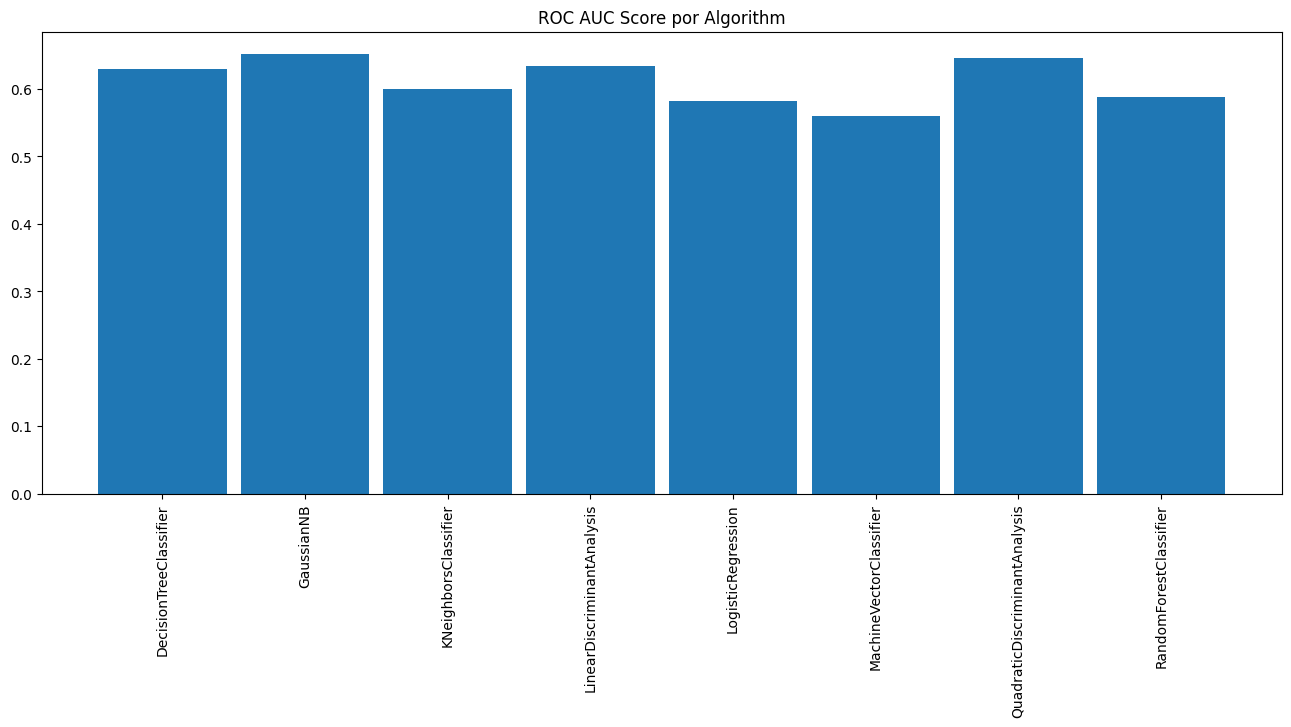

In [320]:
hitogramPremium(resumen_alg,'Algorithm','ROC AUC Score',False)